<a href="https://colab.research.google.com/github/meyounge/MAT422/blob/main/HM3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 3.4

##3.4. Logistic regression

"Logistic regression is a statistical model that uses the logistic function, or logit function, in mathematics as the equation between x and y. The logit function maps y as a sigmoid function of x.
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

Linear regression predicts a continuous dependent variable by using a given set of independent variables. A continuous variable can have a range of values, such as price or age. So linear regression can predict actual values of the dependent variable. It can answer questions like "What will the price of rice be after 10 years?"

Unlike linear regression, logistic regression is a classification algorithm. It cannot predict actual values for continuous data. It can answer questions like "Will the price of rice increase by 50% in 10 years?""$$ $$
Quoted from https://aws.amazon.com/what-is/logistic-regression/ which did not give authorship on the article

Use logistic regression to categorize the sklearn wine dataset using gradient desents. (you may approximate the gradient)
This will display an understanding in gradient desents and logistic regression as a classification algorithm.

For my own reference: [row][col]

Below is a sklearn model for implementing logistic regression

In [225]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def one_hot_encode(y):
  onehot_encoder = OneHotEncoder(sparse_output=False)
  integer_encoded = y.reshape(len(y), 1)
  return onehot_encoder.fit_transform(integer_encoded)

iris = datasets.load_iris()
X = iris.data
y = iris.target

# bias the inputs
init_b = np.ones(len(X))
X = np.column_stack((init_b, X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=95)

# Example usage with pandas DataFrame
irisp = pd.DataFrame(iris.data, columns=iris.feature_names)

logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)

print(y_pred)
print(y_test)
print("Total accuracy: " + str(round(100 * accuracy_score(y_test, y_pred), 3)) + "%")


[2 2 2 0 0 2 1 2 0 1 0 1 0 2 2 2 1 1 2 1 1 2 1 0 0 0 1 1 0 2 1 2 2 2 2 2 1
 0 0 1 1 1 0 2 2]
[2 2 2 0 0 2 1 2 0 1 0 1 0 2 2 2 1 1 2 1 1 2 1 0 0 0 1 1 0 1 1 2 2 2 2 2 1
 0 0 1 1 1 0 2 2]
Total accuracy: 97.778%


###Below is refactored code for an original script I wrote for a different machine learning class that tought linear regression, it for whatever reason doesn't work despite it being equavialent code (I've troubleshot for hours, I give up)... The one below it however is the original; it does work.

In [219]:
def sigmoid(Z):
  return 1 / (1 + np.exp(-np.clip(Z, -250, 250)))

def one_hot_encode(y):
  onehot_encoder = OneHotEncoder(sparse_output=False)
  integer_encoded = y.reshape(len(y), 1)
  return onehot_encoder.fit_transform(integer_encoded)

def argmax(Z):
  maxz = max(Z)
  return [1.0 if z >= maxz else 0 for z in Z]

def logistic_regression_grad(yp, w, Xp):
  U = yp - sigmoid(np.matmul(w, Xp.T)).T
  return np.matmul(Xp.T, U).T

def calculate_tp_tn_accuracy(true_labels, predicted_labels):
  # Calculate true positive (TP) and true negative (TN) counts
  TP = np.sum(np.logical_and(predicted_labels == 1, true_labels == 1))
  TN = np.sum(np.logical_and(predicted_labels == 0, true_labels == 0))

  # Calculate total counts of positive and negative instances
  P = np.sum(true_labels == 1)
  N = np.sum(true_labels == 0)

  # Calculate true positive (TP) and true negative (TN) accuracies
  TP_accuracy = TP / P if P > 0 else 0
  TN_accuracy = TN / N if N > 0 else 0

  return TP_accuracy, TN_accuracy

y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

w = np.ones((len(y_train[0]) , len(X_train[0])))

i = 0
high = 25000
beta = 10**-7
a1 = 1
eps = 10**-5

alpha = beta + a1
T7w = w + np.multiply(alpha, logistic_regression_grad(y_train, w, X_train))
print(np.linalg.norm(w - T7w))
print("Epsilon: " + str(eps))
er = [0] * high
while np.linalg.norm(w -T7w) > eps and i < high:
    alpha = beta + a1 / (i**1.2 + 1)
    w = T7w
    from sklearn.metrics import accuracy_score
    er[i] = 1.0 - accuracy_score(y_train, np.where(np.matmul(w, X_train.T).T > 0, 1, 0))
    T7w = w - alpha * logistic_regression_grad(y_train, w, X_train)
    i += 1

print(np.linalg.norm(w -T7w))





930.911769563196
Epsilon: 1e-05
0.0025530562849375785


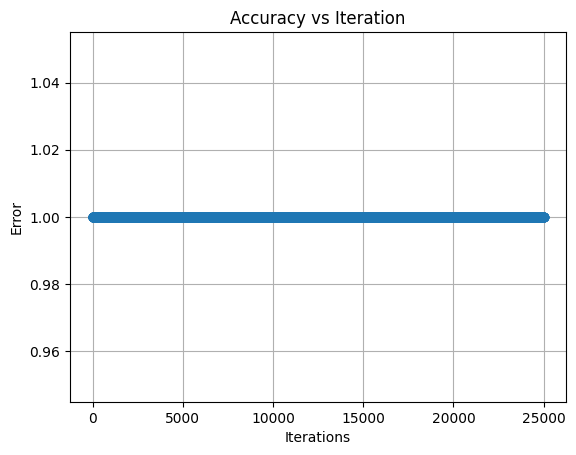

iterations: 25000
[[-1393.05149  -853.608    -616.70432  -157.85152]
 [-1450.95673  -712.56737  -986.47067  -305.9235 ]
 [-1513.82528  -730.76616 -1151.91422  -395.26302]]

Train data:
True positive accuracy: 0.0%
True negative accuracy: 100.0%
Total accuracy: 0.0%

Test data:
True positive accuracy: 0.0%
True negative accuracy: 100.0%
Total accuracy: 0.0%


In [220]:
import matplotlib.pyplot as plt
x = np.arange(i)
plt.plot(x, er[:i], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Accuracy vs Iteration')

# Showing the plot
plt.grid(True)
plt.show()

print("iterations: " +str(i))
print(np.round(T7w,5))

Yp = np.matmul(T7w, X_train.T).T
Yp = np.where(Yp > 0, 1, 0)

tnA, tpA = calculate_tp_tn_accuracy(y_train, Yp)

print("")
print("Train data:")
print("True positive accuracy: " + str(round(tnA*100,3)) + "%")
print("True negative accuracy: " + str(round(tpA*100,3)) + "%")
print("Total accuracy: " + str(round(100 * accuracy_score(y_train, Yp), 3)) + "%")

Yp = np.matmul(T7w, X_test.T).T
Yp = np.where(Yp > 0, 1, 0)

tnA, tpA = calculate_tp_tn_accuracy(y_test, Yp)
print("")
print("Test data:")
print("True positive accuracy: " + str(round(tnA*100,3)) + "%")
print("True negative accuracy: " + str(round(tpA*100,3)) + "%")
print("Total accuracy: " + str(round(accuracy_score(y_test, Yp) * 100, 3)) + "%")


###The original code from my previous class is below

938.7943009702951
Epsilon: 1e-05
0.0001770407346345744


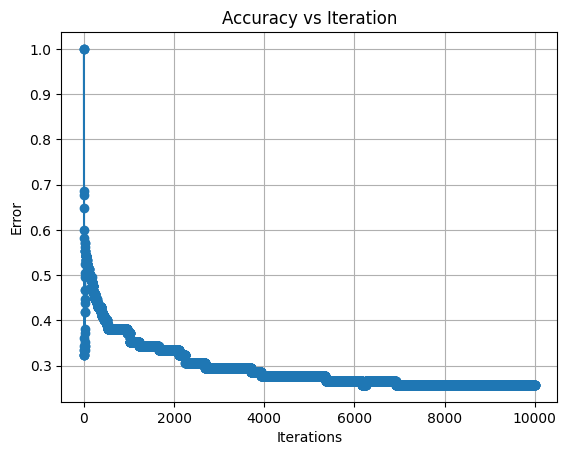

iterations: 10000
[[  20.8426     6.42732  -24.88433]
 [  11.70805    7.89515  -62.85289]
 [ 101.2499   -17.65591  -81.90851]
 [-201.72719    2.82652  110.30659]
 [ -89.53224  -11.76318   64.65459]]

Train data:
True positive accuracy: 86.667%
True negative accuracy: 93.81%
Total accuracy: 74.286%

Test data:
True positive accuracy: 84.444%
True negative accuracy: 93.333%
Total accuracy: 71.111%

Canned algorithm:
Test data:
True positive accuracy: 97.778%
True negative accuracy: 98.889%
Total accuracy: 97.778%


In [221]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 27 14:37:31 2024

@author: Michael Younger
"""

import numpy as np
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def sumAll(vector):
    vector = np.array(vector)  # Convert to numpy array for consistency
    return np.sum(vector)

def sumMatrix(A, B):
    if len(B) != len(A):
        return
    C = [None] * len(A)
    if type(A[0]) == type([]):
        for i in range(len(A)):
            C[i] = sumMatrix(A[i],B[i])
    else:
        for i in range(len(A)):
            C[i] = A[i] + B[i]
    return C

def add_intercept(X):
    Nobs = X.shape[0]
    intercept = np.ones(Nobs, dtype=float)
    return np.column_stack((intercept, X))

def sigmoid(Z):
    return 1 / (1 + np.exp(-np.clip(Z, -250, 250)))

def one_hot_encode(y):
    onehot_encoder = OneHotEncoder(sparse_output=False)
    integer_encoded = y.reshape(len(y), 1)
    return onehot_encoder.fit_transform(integer_encoded)

def argmax(Z):
    maxz = max(Z)
    return [1.0 if z >= maxz else 0 for z in Z]

def most_highly_correlated(my_dataframe, num_to_report):
    # find the correlations
    cormatrix = my_dataframe.corr()

    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T

    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()

    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(num_to_report)

def T7g(yp, w, Xp):
    XT = np.transpose(Xp)
    U = sumMatrix(yp, np.multiply(-1, sigmoid(np.matmul(Xp, w))))
    return np.matmul(XT, U)

def magnitude(A):
    y = 0
    for x in A:
        y = y + x**2
    y = np.sqrt(y)
    return y


def L2Norm(A):
    return np.linalg.norm(A)

def calculate_tp_tn_accuracy(true_labels, predicted_labels):
    # Calculate true positive (TP) and true negative (TN) counts
    TP = np.sum(np.logical_and(predicted_labels == 1, true_labels == 1))
    TN = np.sum(np.logical_and(predicted_labels == 0, true_labels == 0))

    # Calculate total counts of positive and negative instances
    P = np.sum(true_labels == 1)
    N = np.sum(true_labels == 0)

    # Calculate true positive (TP) and true negative (TN) accuracies
    TP_accuracy = TP / P if P > 0 else 0
    TN_accuracy = TN / N if N > 0 else 0

    return TP_accuracy, TN_accuracy

def logRegression(y, X, w, high = 25000, beta = 10**-7, a1 = 1, eps = 10**-5):
    i = 0
    alpha = beta + a1
    T7w = sumMatrix(w, np.multiply(alpha, T7g(y,w,X)))
    print(L2Norm(sumMatrix(w, np.multiply(-1 , T7w))))
    print("Epsilon: " +str(eps))
    er = [0] * high
    while L2Norm(sumMatrix(w, np.multiply(-1 , T7w))) > eps and i < high:
        alpha = beta + a1 / (i**1.2 + 1)
        w = T7w
        from sklearn.metrics import accuracy_score
        er[i] = 1.0 - accuracy_score(y, np.where(np.matmul(X, w) > 0, 1, 0))
        T7w = sumMatrix(w, np.multiply(alpha, T7g(y,w,X)))
        i += 1

    print(L2Norm(sumMatrix(w, np.multiply(-1 , T7w))))
    return T7w, i, er

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

init_b = [1] * len(X)
X = np.column_stack((init_b, X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=95)

y_train_m = one_hot_encode(y_train)
y_test_m = one_hot_encode(y_test)
# Example usage with pandas DataFrame
irisp = pd.DataFrame(iris.data, columns=iris.feature_names)
#print("Most Highly Correlated")
#print(most_highly_correlated(irisp, 4))
#print('\n', irisp.head())

w = [[1] * len(y_train_m[0])] * len(X_train[0])


T7w, i, er = logRegression(y_train_m, X_train, w, 10000)

import matplotlib.pyplot as plt
x = np.arange(i)
plt.plot(x, er[:i], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Accuracy vs Iteration')

# Showing the plot
plt.grid(True)
plt.show()

print("iterations: " +str(i))
print(np.round(T7w,5))

Yp = np.matmul(X_train, T7w)
Yp = np.where(Yp > 0, 1, 0)

tnA, tpA = calculate_tp_tn_accuracy(y_train_m, Yp)

print("")
print("Train data:")
print("True positive accuracy: " + str(round(tnA*100,3)) + "%")
print("True negative accuracy: " + str(round(tpA*100,3)) + "%")
print("Total accuracy: " + str(round(100 * accuracy_score(y_train_m, Yp), 3)) + "%")

Yp = np.matmul(X_test, T7w)
Yp = np.where(Yp > 0, 1, 0)

tnA, tpA = calculate_tp_tn_accuracy(y_test_m, Yp)
print("")
print("Test data:")
print("True positive accuracy: " + str(round(tnA*100,3)) + "%")
print("True negative accuracy: " + str(round(tpA*100,3)) + "%")
print("Total accuracy: " + str(round(accuracy_score(y_test_m, Yp) * 100, 3)) + "%")


##Problem 6

logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)

tnA, tpA = calculate_tp_tn_accuracy(one_hot_encode(y_test), one_hot_encode(y_pred))

print("")
print("Canned algorithm:")
print("Test data:")
print("True positive accuracy: " + str(round(tnA*100,3)) + "%")
print("True negative accuracy: " + str(round(tpA*100,3)) + "%")
print("Total accuracy: " + str(round(100 * accuracy_score(y_test, y_pred), 3)) + "%")


